# Data Preparation

In [31]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=6, micro=5, releaselevel='final', serial=0)

In [36]:
import pandas as pd
print (pd.__version__)
import numpy as np
print (np.__version__)
import seaborn as sns
print (sns.__version__)
import matplotlib.pyplot as plt
import sklearn
print (sklearn.__version__)

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydotplus
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz/bin/'

%matplotlib inline  

0.23.0
1.14.3
0.8.1
0.19.1


In [37]:
# Read training data
data = pd.read_csv('../data/PurchaseBehaviour.csv')
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [38]:
data['Stay_In_Current_City_Years'][data['Stay_In_Current_City_Years']=='4+'] = '4'
data['Stay_In_Current_City_Years'] = pd.to_numeric(data['Stay_In_Current_City_Years'])
data['Stay_In_Current_City_Years'].unique()

C:\ana\envs\itda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([2, 4, 3, 1, 0], dtype=int64)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 50.4+ MB


In [40]:
data.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,1.858418,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,1.289443,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,2.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,3.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [41]:
print('data:',len(data),\
      'products:',len(data['Product_ID'].unique()),\
      'Product_Category_1',len(data['Product_Category_1'].unique()),\
      'Product_Category_2',len(data['Product_Category_2'].unique()),\
      'Product_Category_3',len(data['Product_Category_3'].unique()))

data: 550068 products: 3631 Product_Category_1 20 Product_Category_2 18 Product_Category_3 16


In [42]:
for var in list(data):
    print(var,': ',len(data[var].unique()))

User_ID :  5891
Product_ID :  3631
Gender :  2
Age :  7
Occupation :  21
City_Category :  3
Stay_In_Current_City_Years :  5
Marital_Status :  2
Product_Category_1 :  20
Product_Category_2 :  18
Product_Category_3 :  16
Purchase :  18105


In [43]:
data['Product_Category_3'] = data['Product_Category_3'].fillna(99)
data['Product_Category_2'] = data['Product_Category_2'].fillna(99)

In [44]:
data['Product_Category_3'].unique()

array([99., 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

C:\ana\envs\itda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


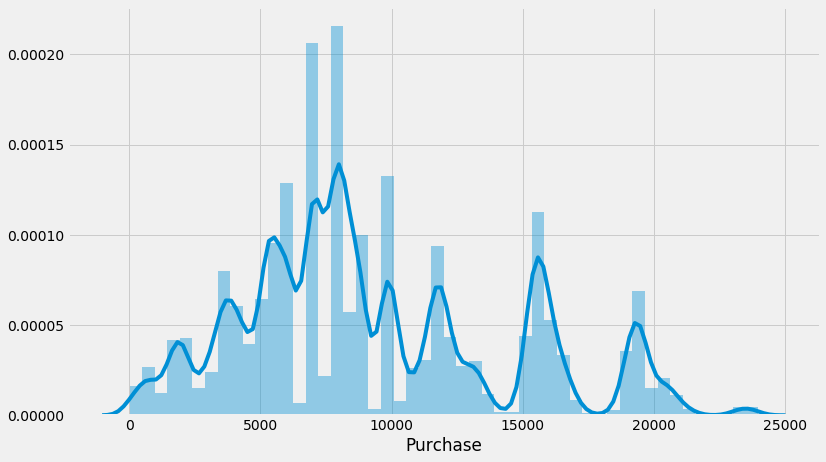

In [45]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(data.Purchase, bins = 50)

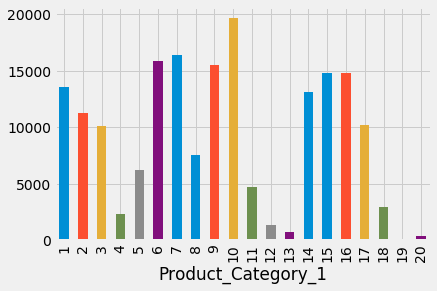

In [51]:
# average purchases per product categorie
data.groupby('Product_Category_1')['Purchase'].mean().plot.bar()

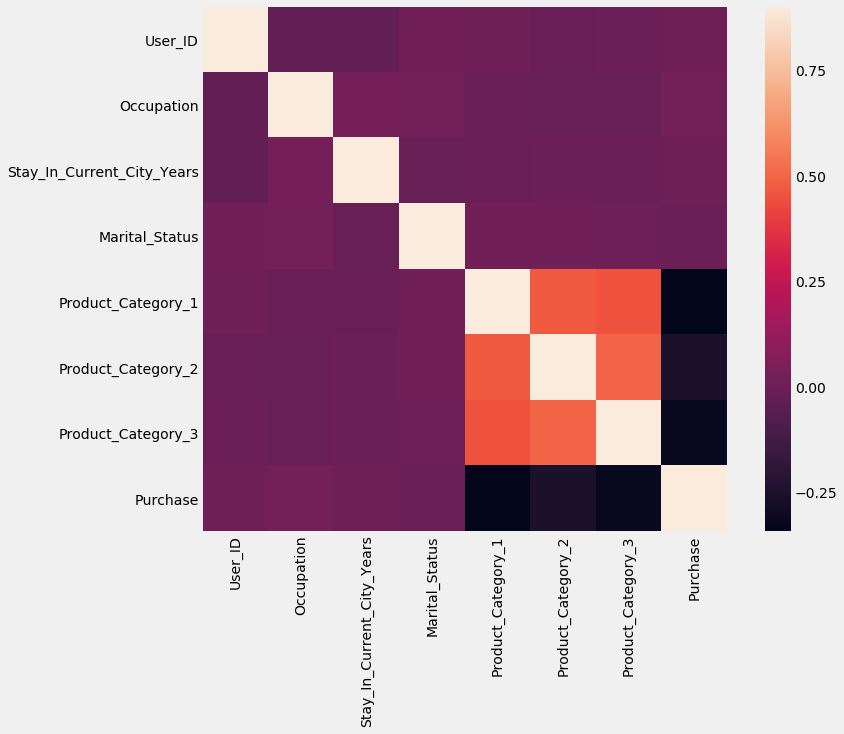

In [52]:
numeric_features = data.select_dtypes(include=[np.number])
corr = numeric_features.corr()

#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.9, square=True);

In [53]:
categorical_var = ['Gender','Age','Occupation','City_Category','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']

for var in categorical_var:
    data[var] = pd.Categorical(data[var])
    data_ = pd.get_dummies(data[var],prefix=str(var))
    last_item = var + '_' + str(np.sort(data[var].unique())[-1])
    print(last_item)
    del data_[last_item]
    data = pd.concat([data, data_], axis=1)
    del data[var]
    
features = data

Gender_M
Age_55+
Occupation_20
City_Category_C
Marital_Status_1
Product_Category_1_20
Product_Category_2_99.0
Product_Category_3_99.0


In [54]:
features['cnt_User_ID'] = features.groupby('User_ID')['User_ID'].transform('count')
features['cnt_Product_ID'] = features.groupby('Product_ID')['Product_ID'].transform('count')
del features['User_ID']
del features['Product_ID']

In [55]:

from sklearn import preprocessing, model_selection

X = data.drop(['Purchase'], axis = 1)
X = np.array(X)
X = preprocessing.scale(X)
Y = data['Purchase']
Y_d = pd.qcut(Y,10)

C:\ana\envs\itda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
# Split the data into training/testing sets
X_train = X[:round(len(X)*0.8)]
X_test = X[round(len(X)*0.8):]

# Split the targets into training/testing sets
Y_train = Y[:round(len(X)*0.8)]
Y_test = Y[round(len(X)*0.8):]

## Features and Labels

In [58]:
features[:2]

,Stay_In_Current_City_Years,Purchase,Gender_F,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Occupation_0,...,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,cnt_User_ID,cnt_Product_ID
0,2,8370,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,227
1,2,15200,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,35,581


In [59]:
# Labels are the values we want to predict
labels = np.array(features['Purchase'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Purchase', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

## Training and Testing Sets

In [60]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [61]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (412551, 84)
Training Labels Shape: (412551,)
Testing Features Shape: (137517, 84)
Testing Labels Shape: (137517,)


## Establish Baseline

In [62]:
# The baseline predictions are the historical averages
#baseline_preds = test_features[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
#baseline_errors = abs(baseline_preds - test_labels)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_features, train_labels);

In [64]:
# Use the forest's predict method on the test data
predictions = lr.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'Pseudo r2:', round(r2_score(predictions,test_labels), 2))
 

Mean Absolute Error: 2166.26 Pseudo r2: 0.51


## Training the Forest

In [65]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 100, max_depth = 20, max_leaf_nodes=80,random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [50]:
%%time
for n_est in [50,100,200,400]:
    rf = RandomForestRegressor(n_estimators= n_est, max_depth = 20, max_leaf_nodes=80,random_state=42)

    # Train the model on training data
    rf.fit(train_features, train_labels);
    
    # Use the forest's predict method on the test data
    predictions = rf.predict(test_features)

    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
    print('Number of Trees:',n_est,'Mean Absolute Error:', round(np.mean(errors), 2), 'Pseudo r2:', round(r2_score(predictions,test_labels), 2))
 

Number of Trees: 50 Mean Absolute Error: 2217.99 Pseudo r2: 0.47
Number of Trees: 100 Mean Absolute Error: 2217.94 Pseudo r2: 0.47
Number of Trees: 200 Mean Absolute Error: 2217.92 Pseudo r2: 0.47


KeyboardInterrupt: 

In [42]:
%%time
for leafs in [20,40,60,80,100]:
    rf = RandomForestRegressor(n_estimators= 50, max_depth = 7, max_leaf_nodes=leafs,random_state=42)

    # Train the model on training data
    rf.fit(train_features, train_labels);
    
    # Use the forest's predict method on the test data
    predictions = rf.predict(test_features)

    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
     print('max leaf nodes:',leafs,'Mean Absolute Error:', round(np.mean(errors), 2), 'Pseudo r2:', round(r2_score(predictions,test_labels), 2))
    

Number of Trees: 800 Mean Absolute Error: 2584.7 degrees.
Number of Trees: 800 Mean Absolute Error: 2569.94 degrees.
Number of Trees: 800 Mean Absolute Error: 2568.59 degrees.
Number of Trees: 800 Mean Absolute Error: 2568.03 degrees.
Number of Trees: 800 Mean Absolute Error: 2567.85 degrees.
Wall time: 30min 17s


In [44]:
%%time
for depth in [10,20, 40,80,160]:
    rf = RandomForestRegressor(n_estimators= 50, max_depth = depth, max_leaf_nodes=80,random_state=42)

    # Train the model on training data
    rf.fit(train_features, train_labels);
    
    # Use the forest's predict method on the test data
    predictions = rf.predict(test_features)

    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
     print('max depth:',depth,'Mean Absolute Error:', round(np.mean(errors), 2), 'Pseudo r2:', round(r2_score(predictions,test_labels), 2))

    

Number of Trees: 10 Mean Absolute Error: 2315.45 degrees.
Number of Trees: 20 Mean Absolute Error: 2217.99 degrees.
Number of Trees: 40 Mean Absolute Error: 2217.99 degrees.
Number of Trees: 80 Mean Absolute Error: 2217.99 degrees.
Number of Trees: 160 Mean Absolute Error: 2217.99 degrees.
Wall time: 44min 32s


## Make Predictions on Test Data

In [66]:
from sklearn.metrics import r2_score
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Pseudo r2:', round(r2_score(predictions,test_labels), 2), 'Mean Absolute Error:', round(np.mean(errors), 2))



Pseudo r2: 0.54 Mean Absolute Error: 2105.8


In [67]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 59.09 %.


## Visualizing a Single Decision Tree

In [35]:

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
#(graph, ) = pydotplus.graph_from_dot_file('tree.dot')
graph = pydotplus.graphviz.graph_from_dot_file("tree.dot")
# Write graph to a png file
#(graph.create_png())
graph.write_png('img/tree.png'); 

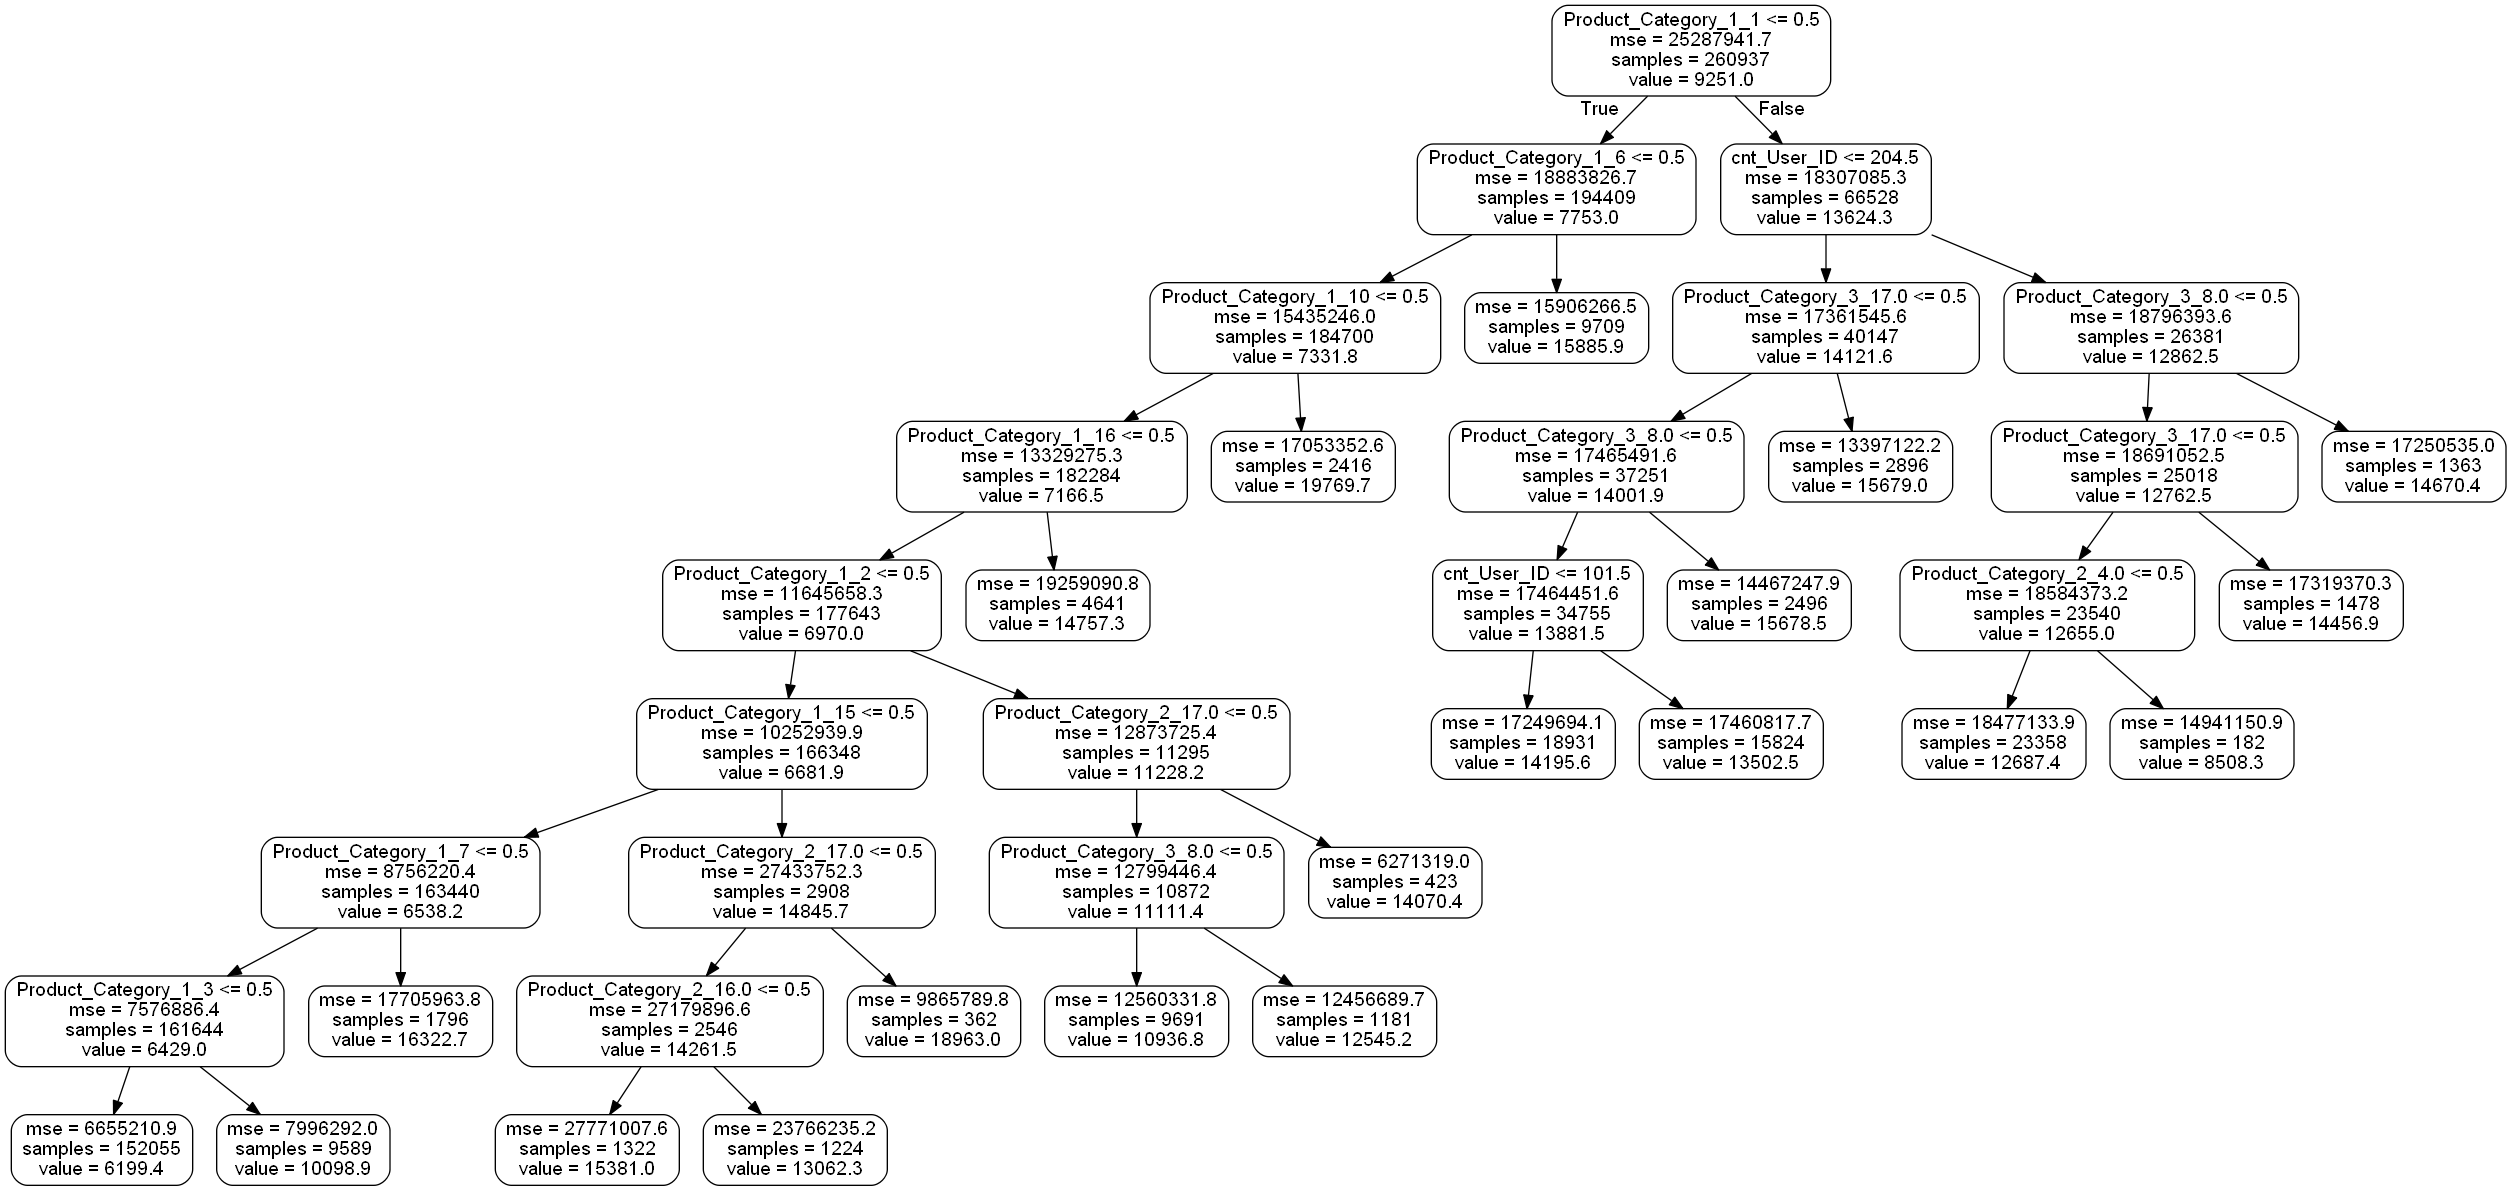

In [36]:
from IPython.display import Image
Image("img/tree.png")

![Decision Tree](tree.png)

In [37]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 8


Smaller tree for visualization.

In [ ]:
# Limit depth of tree to 2 levels

rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')


In [ ]:
graph.write_png('small_tree.png')

![Small Decision Tree](small_tree.PNG)

### Annotated Version of Tree

![Annotated Decision Tree](small_tree_annotated.PNG)

## Variable Importances

In [39]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]];

Variable: Product_Category_1_1 Importance: 0.44
Variable: Product_Category_1_6 Importance: 0.17
Variable: Product_Category_1_10 Importance: 0.1
Variable: Product_Category_1_16 Importance: 0.07
Variable: Product_Category_1_2 Importance: 0.06
Variable: Product_Category_1_7 Importance: 0.05
Variable: Product_Category_1_15 Importance: 0.05
Variable: Product_Category_1_3 Importance: 0.04
Variable: cnt_User_ID          Importance: 0.01
Variable: Unnamed: 0           Importance: 0.0


### Two Most Important Features

In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

## Visualizations

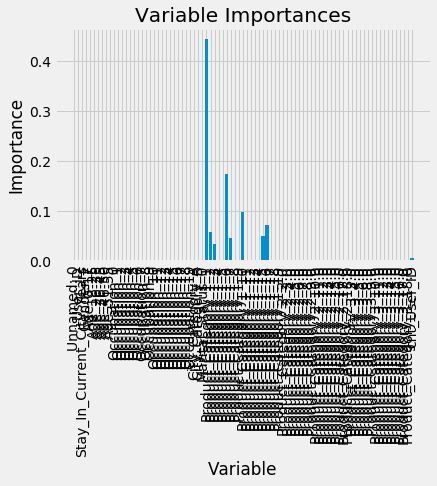

In [40]:
# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 